In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('bank.csv', delimiter=";")

print(data.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [31]:
# Split the dataset into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for the target

# Categorical columns to be one-hot encoded
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'poutcome']

# Numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Preprocessing: OneHotEncode categorical variables, Standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [32]:
# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:

# Define Logistic Regression model
logreg = LogisticRegression()

# Combine preprocessing and logistic regression in a pipeline
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', logreg)])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_pipeline.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Cross-validation accuracy
logreg_cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=10)
print(f"Cross-validation Accuracy: {logreg_cv_scores.mean():.4f}")


Test Set Accuracy: 0.8983
Cross-validation Accuracy: 0.9021


In [34]:
# Lasso (L1) Regularization
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(penalty='l1', C=1/0.1,solver='liblinear'))])

# Train Lasso model
lasso_pipeline.fit(X_train, y_train)

# Evaluate Lasso model on test set
y_pred_lasso = lasso_pipeline.predict(X_test)
lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
print(f"Lasso (L1) Accuracy: {lasso_accuracy:.4f}")

# Cross-validation scores with Lasso regularization
lasso_cv_scores = cross_val_score(lasso_pipeline, X_train, y_train, cv=10)
print(f"Cross-validation Accuracy (Lasso): {np.mean(lasso_cv_scores):.4f}")

Lasso (L1) Accuracy: 0.8983
Cross-validation Accuracy (Lasso): 0.9038


In [35]:
# Ridge (L2) Regularization
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(penalty='l2',C=1/0.5, solver='liblinear'))])

# Train Ridge model
ridge_pipeline.fit(X_train, y_train)

# Evaluate Ridge model on test set
y_pred_ridge = ridge_pipeline.predict(X_test)
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
print(f"Ridge (L2) Accuracy: {ridge_accuracy:.4f}")

# Cross-validation scores with Ridge regularization
ridge_cv_scores = cross_val_score(ridge_pipeline, X_train, y_train, cv=10)
print(f"Cross-validation Accuracy (Ridge): {np.mean(ridge_cv_scores):.4f}")


Ridge (L2) Accuracy: 0.8992
Cross-validation Accuracy (Ridge): 0.9035


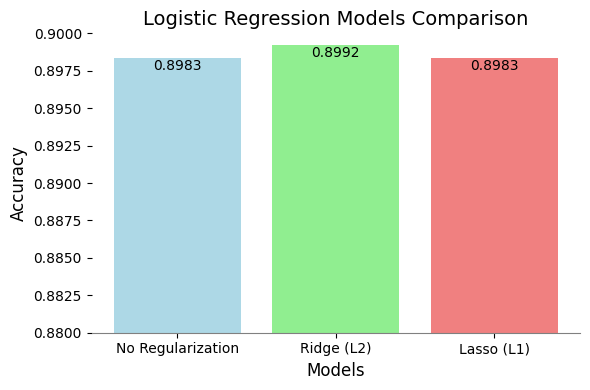

In [36]:
import matplotlib.pyplot as plt

# Comparing the performance of the three models
models = ['No Regularization', 'Ridge (L2)', 'Lasso (L1)']
scores = [accuracy, ridge_accuracy, lasso_accuracy]

# Plotting the model comparison with more visible differences
plt.figure(figsize=(6, 4))
bars = plt.bar(models, scores, color=['lightblue', 'lightgreen', 'lightcoral'])

# Add text labels for each bar with the accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height - 0.001, f'{height:.4f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Simplified axis labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Logistic Regression Models Comparison', fontsize=14)

# Adjusting the y-axis limits to focus on small accuracy differences
plt.ylim([0.88, 0.90])

# Minimal styling: remove frame and show only bottom line
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_color('gray')

# Minimal ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
# Try different values for alpha (regularization strength)
alpha_values = [0.1, 0.5, 1, 5, 10, 20]

# For Ridge (L2)
for alpha in alpha_values:
    ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(penalty='l2', C=1/alpha, solver='liblinear'))])
    ridge_pipeline.fit(X_train, y_train)
    ridge_accuracy = ridge_pipeline.score(X_test, y_test)
    print(f'Ridge (alpha={alpha}) Test Accuracy: {ridge_accuracy:.4f}')

# For Lasso (L1)
for alpha in alpha_values:
    lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear'))])
    lasso_pipeline.fit(X_train, y_train)
    lasso_accuracy = lasso_pipeline.score(X_test, y_test)
    print(f'Lasso (alpha={alpha}) Test Accuracy: {lasso_accuracy:.4f}')



Ridge (alpha=0.1) Test Accuracy: 0.8983
Ridge (alpha=0.5) Test Accuracy: 0.8992
Ridge (alpha=1) Test Accuracy: 0.8974
Ridge (alpha=5) Test Accuracy: 0.8966
Ridge (alpha=10) Test Accuracy: 0.8957
Ridge (alpha=20) Test Accuracy: 0.8930
Lasso (alpha=0.1) Test Accuracy: 0.8983
Lasso (alpha=0.5) Test Accuracy: 0.8974
Lasso (alpha=1) Test Accuracy: 0.8974
Lasso (alpha=5) Test Accuracy: 0.8974
Lasso (alpha=10) Test Accuracy: 0.8974
Lasso (alpha=20) Test Accuracy: 0.8921


# KNN model

In [38]:
k = 17
knn = KNeighborsClassifier(n_neighbors=k)

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN (k={k}) Test Accuracy: {knn_accuracy:.4f}")


KNN (k=17) Test Accuracy: 0.8957


In [39]:
# Trying different values of k for KNN
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 18 ,20 ,21, 40]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])
    knn_pipeline.fit(X_train, y_train)
    y_pred_knn = knn_pipeline.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    print(f"KNN (k={k}) Test Accuracy: {knn_accuracy:.4f}")


KNN (k=3) Test Accuracy: 0.8948
KNN (k=5) Test Accuracy: 0.8921
KNN (k=7) Test Accuracy: 0.8912
KNN (k=9) Test Accuracy: 0.8904
KNN (k=11) Test Accuracy: 0.8948
KNN (k=13) Test Accuracy: 0.8939
KNN (k=15) Test Accuracy: 0.8948
KNN (k=17) Test Accuracy: 0.8957
KNN (k=18) Test Accuracy: 0.8948
KNN (k=20) Test Accuracy: 0.8957
KNN (k=21) Test Accuracy: 0.8957
KNN (k=40) Test Accuracy: 0.8912
